# Data Visualization

In [104]:
import os
import pandas as pd
import matplotlib.pyplot as plt

DATASET_PATH = "."
FILENAME = "TrainData.csv"

# reading the dataset and converting to a DataFrame
def load_training_data(dataset_path=DATASET_PATH, filename=FILENAME):
    csv_path = os.path.join(dataset_path, filename)
    return pd.read_csv(csv_path)

In [105]:
# store the leads for use
leads = load_training_data()

# convert DTLeadCreated to datetime
leads["DTLeadCreated"] = pd.to_datetime(leads["DTLeadCreated"])
leads["DTLeadAllocated"] = pd.to_datetime(leads["DTLeadAllocated"])

# new column with numeric representing the month
# leads["MonthOfEnquiry"] = leads["DTLeadCreated"].dt.month.astype("int64")

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73286 entries, 0 to 73285
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 73286 non-null  object        
 1   LeadID                     73286 non-null  int64         
 2   DTLeadCreated              73286 non-null  datetime64[ns]
 3   DTLeadAllocated            73286 non-null  datetime64[ns]
 4   Dealer                     73286 non-null  object        
 5   LeadSource                 73286 non-null  object        
 6   LeadType                   73286 non-null  object        
 7   Seek                       73286 non-null  object        
 8   InterestMake               72056 non-null  object        
 9   InterestModel              66441 non-null  object        
 10  OBSFullName                73286 non-null  object        
 11  OBSEmail                   65499 non-null  object        
 12  Doma

In [106]:
leads.head() # have a look at the first 5 instance

,CustomerID,LeadID,DTLeadCreated,DTLeadAllocated,Dealer,LeadSource,LeadType,Seek,InterestMake,InterestModel,...,OBSEmail,Domain,CellPrefix,CellPhoneNoLength,HourOfEnquiry,DayOfEnquiry,InFinanceProcessSystemApp,FinanceApplied,FinanceApproved,VehicleSold
0,D3B8E20E-F798-4CA9-94EE-FF6D0E7E99F2,11187465,2025-02-15 14:34:00,2025-02-17 11:47:00,Motus Chery Germiston,DEALER FACEBOOK,Facebook,New,Chery,Tiggo 4 Pro 1.5 LIT MIT,...,XXXXXXXXXXXXXXXXXXX5@gmail.com,@gmail.com,61,10,14,15,0,0,0,0
1,372AB00B-6A1C-45D1-8D29-29287C627D3B,11187550,2025-02-15 14:50:00,2025-02-15 14:50:00,Renault Northcliff - 70045,RR-Dealer Facebook-Renault,Facebook,New,Renault,Triber,...,XXXXXXXX@gmail.com,@gmail.com,83,10,14,15,0,0,0,0
2,74262064-94E9-4E7E-9C01-CA8405243929,11187564,2025-02-15 14:51:00,2025-02-17 09:01:00,Durban Multifranchise - 70111,KIA-CCPPG-SONET,Other,New,KIA,Sonet,...,XXXXXXXXX39@gmail.com,@gmail.com,79,10,14,15,0,0,0,0
3,F4D65935-310B-455D-B414-1759C3B807F7,11187583,2025-02-15 14:55:00,2025-02-15 14:57:00,Lindsay Saker VW Germiston,Group Website VW: Specials,Website,New,Volkswagen,Polo Vivo,...,XXXXXXXXXX@gmail.com,@gmail.com,71,10,14,15,1,0,0,1
4,A732E82D-B4BE-438C-9690-07AB3EFD9CD4,11187615,2025-02-15 15:04:00,2025-02-15 15:04:00,Durban Multifranchise - 70111,TikTok,TikTok,New,Renault,Kwid,...,XXXXXXXXXX12@gmail.com,@gmail.com,71,10,15,15,0,0,0,0


In [107]:
leads_no_id = leads.drop("LeadID", axis=1)
leads_no_id.describe() # description of all the numerical fields in the dataset

,DTLeadCreated,DTLeadAllocated,CellPhoneNoLength,HourOfEnquiry,DayOfEnquiry,InFinanceProcessSystemApp,FinanceApplied,FinanceApproved,VehicleSold
count,73286,73286,73286.000000,73286.000000,73286.000000,73286.000000,73286.000000,73286.000000,73286.000000
mean,2025-02-15 18:28:01.327129344,2025-02-16 01:03:56.032530176,9.994828,13.772617,16.563832,0.212769,0.156374,0.066261,0.044047
min,2025-01-01 00:09:00,2025-01-01 02:12:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2025-01-23 21:07:15,2025-01-24 08:32:00,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,2025-02-15 16:50:30,2025-02-16 02:07:30,10.000000,14.000000,17.000000,0.000000,0.000000,0.000000,0.000000
75%,2025-03-11 10:35:00,2025-03-11 11:01:45,10.000000,18.000000,23.000000,0.000000,0.000000,0.000000,0.000000
max,2025-03-31 23:57:00,2025-05-16 09:43:00,14.000000,23.000000,31.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,NaN,0.289382,5.375748,8.245212,0.409269,0.363212,0.248739,0.205200


In [108]:
leads_dealers = leads["Dealer"].value_counts() # dealers with the most / least leads
leads_dealers.to_csv(os.path.join(DATASET_PATH, "Dealers.csv"), index=True)
print(leads_dealers)

Dealer
Durban Multifranchise - 70111       3361
East Rand Multifranchise - 70043    3115
Nelspruit Multifranchise - 70024    2684
Alberton Multifranchise -70051      2326
Renault Northcliff - 70045          2193
                                    ... 
Isuzu Trucks Bloemfontein             17
Volvo Bloemfontein                    16
Jaguar & Land Rover Bloemfontein       8
BMW Motorrad Bloemfontein              7
Motus Isuzu Trucks Vereeniging         2
Name: count, Length: 115, dtype: int64


In [109]:
leads_sources = leads["LeadSource"].value_counts() # lead sources and their count
leads_sources.to_csv(os.path.join(DATASET_PATH, "LeadSources.csv"), index=True)
print(leads_sources)

LeadSource
DEALER FACEBOOK                            10165
AUTOTRADER                                  5402
Cars.co.za                                  3481
RR-Dealer Facebook-Renault                  2845
MS-Pmax-NextLevel-CPC                       2531
                                           ...  
HSA-C2B-GUPSHUP                                1
GroupWebsite-FB-CBD-CPC                        1
MSA-www.mitsubishi.co.za/VehicleEnquiry        1
RSA-CARS.CO.ZA-USED                            1
HSA-WEB-BOOKATESTDRIVE_GADS_DEALERNV           1
Name: count, Length: 450, dtype: int64


In [110]:
leads["LeadType"].value_counts() # lead types and their counts

LeadType
Facebook         25572
Other            12886
Website          10333
CPC               7410
AutoTrader        7105
Cars.co.za        3743
TikTok            2488
Kia Retail        1976
Carfind.co.za     1773
Name: count, dtype: int64

In [111]:
leads["Seek"].value_counts() # new / used count

Seek
New     42259
Used    31027
Name: count, dtype: int64

In [112]:
interest_makes = leads["InterestMake"].value_counts() # top and least popular makes/brands
interest_makes.to_csv(os.path.join(DATASET_PATH, "InterestMakes.csv"), index=True)
print(interest_makes)

InterestMake
Renault            16667
Volkswagen          6512
Toyota              5146
Hyundai             3646
KIA                 3135
                   ...  
ISUZU OFCOURSE!        1
Izuzu                  1
RAV 4                  1
Toyota RAV4            1
Yaris                  1
Name: count, Length: 353, dtype: int64


In [113]:
interest_models = leads["InterestModel"].value_counts() # most / least popular models
interest_models.to_csv(os.path.join(DATASET_PATH, "InterestModels.csv"), index=True)
print(interest_models)

InterestModel
Kwid                             5972
Triber                           2886
Sonet                            1768
Koleos                           1504
Kiger                            1393
                                 ... 
GX CVT                              1
Grand Vitara 1.5 GLX auto           1
220i M SPORT A/T(F22)               1
Acenta 1.0 CVT                      1
Amarok 2.0TDI double cab Life       1
Name: count, Length: 4684, dtype: int64


In [114]:
leads_domains = leads["Domain"].value_counts() # most popular email domain enquiring
leads_domains.to_csv(os.path.join(DATASET_PATH, "Domains.csv"), index=True)
print(leads_domains)

Domain
@gmail.com               54684
@yahoo.com                1622
@icloud.com                986
@gmail.com                 394
@outlook.com               388
                         ...  
@karusa.co.za                1
@UKDM.GOV.ZA                 1
@platesolutions.co.za        1
@purplemobile.co.za          1
@madembeict.com              1
Name: count, Length: 3260, dtype: int64


In [115]:
cell_prefixes = leads["CellPrefix"].value_counts()
cell_prefixes.to_csv(os.path.join(DATASET_PATH, "CellPrefixes.csv"))
print(cell_prefixes)

CellPrefix
82     7018
72     6520
76     5712
83     5670
79     5135
       ... 
0+5       1
263       1
337       1
268       1
5         1
Name: count, Length: 105, dtype: int64


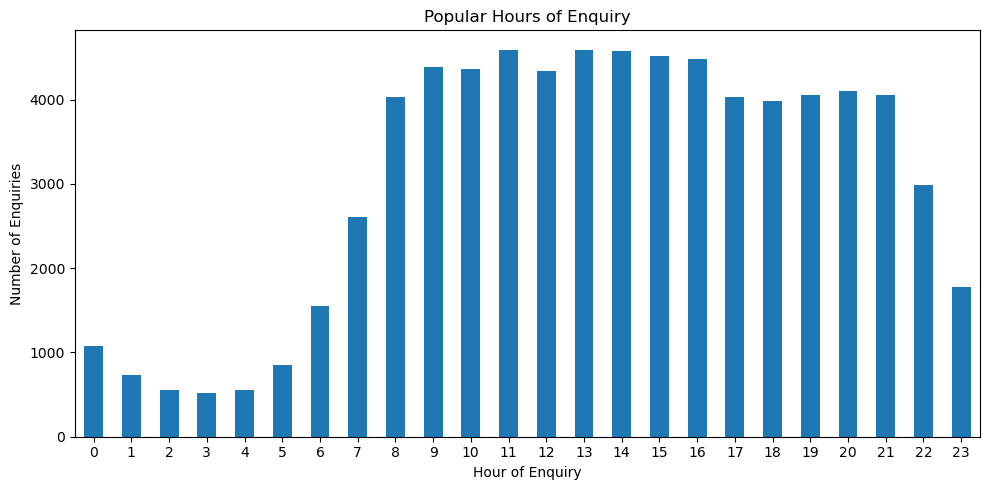

In [116]:
leads_per_hour = leads["HourOfEnquiry"].value_counts().sort_index()
leads_per_hour.plot(kind="bar", figsize=(10, 5))
plt.xlabel("Hour of Enquiry")
plt.ylabel("Number of Enquiries")
plt.title("Popular Hours of Enquiry")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

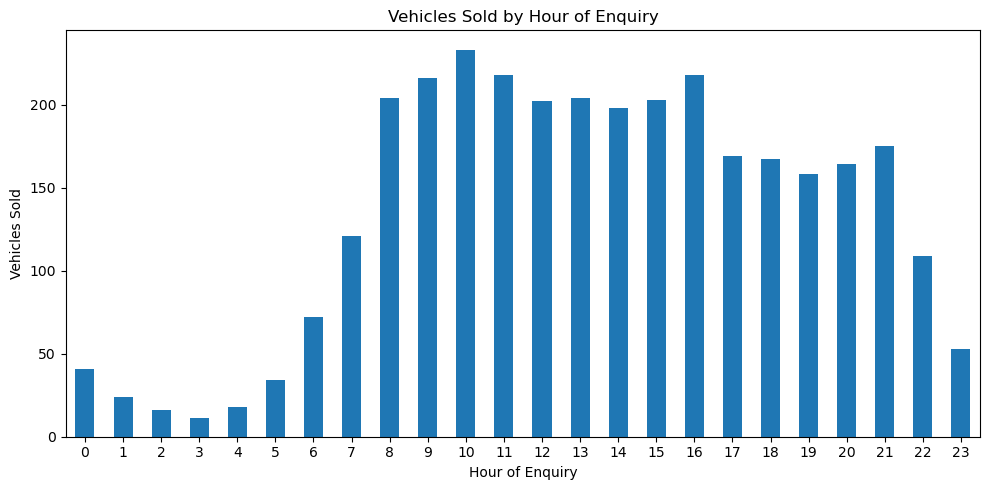

In [117]:
# Keep only the rows where the vehicle was actually sold
sold_leads = leads[leads["VehicleSold"] == 1]
unsold_leads = leads[leads["VehicleSold"] == 0]

# Count the number of sold vehicles for each hour, and sort by hour the lead was created
sold_per_hour = sold_leads["HourOfEnquiry"].value_counts().sort_index()
sold_per_hour.plot(kind="bar", figsize=(10, 5))

plt.xlabel("Hour of Enquiry")
plt.ylabel("Vehicles Sold")
plt.title("Vehicles Sold by Hour of Enquiry")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

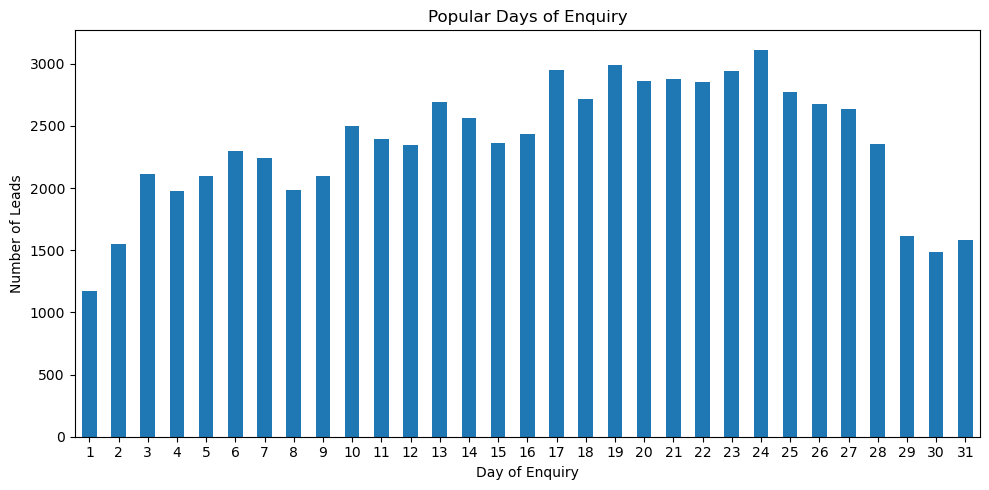

In [118]:
# count the number of leads for each day or sort it
leads_per_day = leads["DayOfEnquiry"].value_counts().sort_index()
leads_per_day.plot(kind="bar", figsize=(10, 5))
plt.xlabel("Day of Enquiry")
plt.ylabel("Number of Leads")
plt.title("Popular Days of Enquiry")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

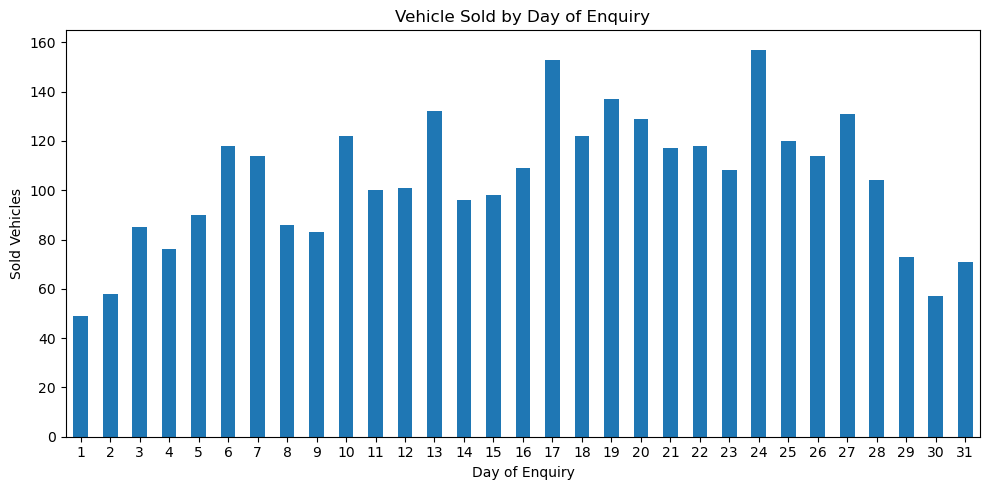

In [119]:
# get the number of sales as a result of the day of equiry
sold_per_day = sold_leads["DayOfEnquiry"].value_counts().sort_index()
sold_per_day.plot(kind="bar", figsize=(10, 5))
plt.xlabel("Day of Enquiry")
plt.ylabel("Sold Vehicles")
plt.title("Vehicle Sold by Day of Enquiry")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

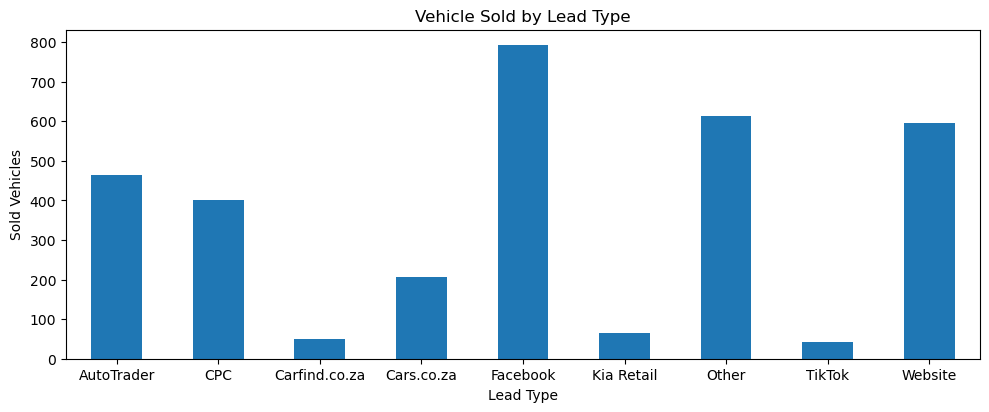

In [120]:
# get the number of sales as a result of the day of equiry
sold_per_lead_type = sold_leads["LeadType"].value_counts().sort_index()
sold_per_lead_type.plot(kind="bar", figsize=(10, 5))
plt.xlabel("Lead Type")
plt.ylabel("Sold Vehicles")
plt.title("Vehicle Sold by Lead Type")
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

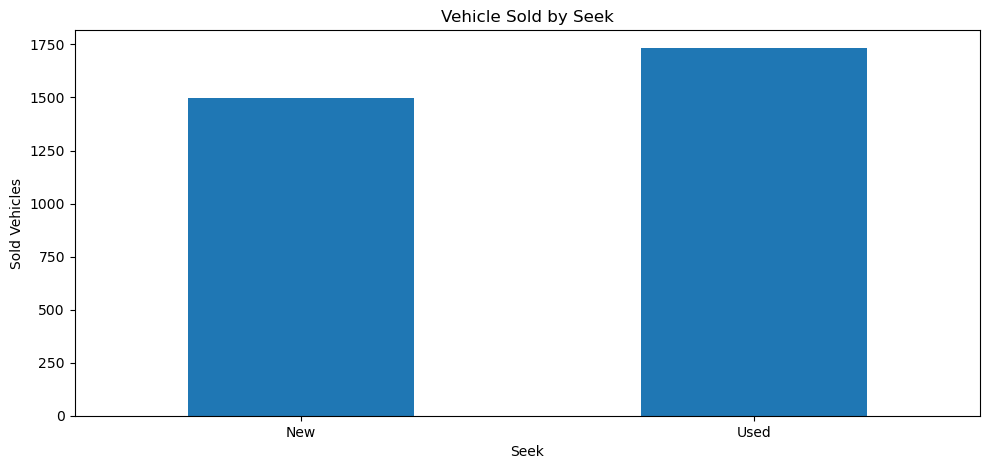

In [121]:
# get the number of sales as a result of the car seek
sold_per_lead_type = sold_leads["Seek"].value_counts().sort_index()
sold_per_lead_type.plot(kind="bar", figsize=(10, 5))
plt.xlabel("Seek")
plt.ylabel("Sold Vehicles")
plt.title("Vehicle Sold by Seek")
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

# Data Cleaning

In [122]:
leads_copy = load_training_data()

In [123]:
# gwtw number of leads that ended in a vehicle sale for training data 
sale_rate = leads_copy["VehicleSold"].mean()
print("Percentage of leads resulting in a vehicle sale: {:.2f}%".format(sale_rate *100))

Percentage of leads resulting in a vehicle sale: 4.40%


In [124]:
leads_copy = leads_copy.drop("CustomerID", axis=1) # Dropping the customer ID

In [125]:
leads_copy = leads_copy.drop("LeadID", axis=1) # Dropping Lead ID

In [126]:
# Converting DTLeadCreated to type DateTime
leads_copy["DTLeadCreated"] = pd.to_datetime(leads_copy["DTLeadCreated"])
leads_copy["DayOfWeek"] = leads_copy["DTLeadCreated"].dt.dayofweek # Extracting The Day of the Week from the date

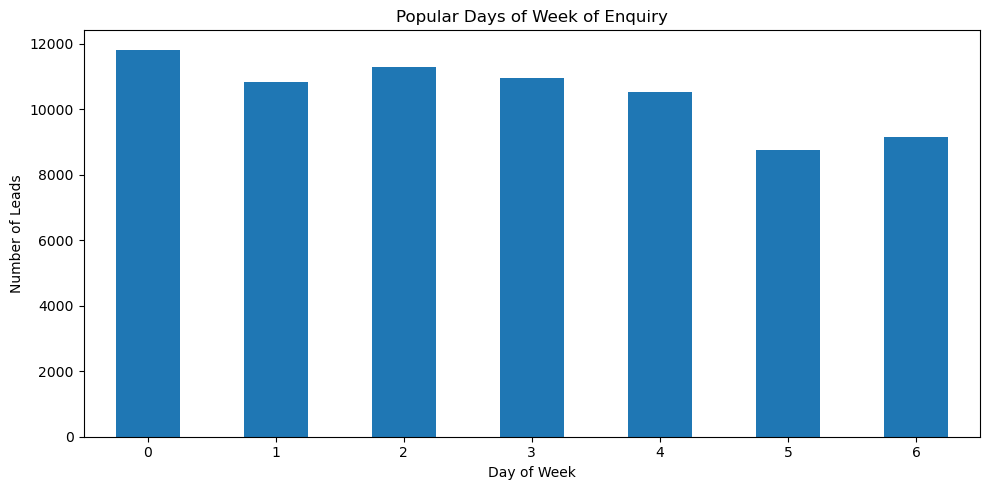

In [127]:
# count the number of leads for each day or sort it
leads_per_day = leads_copy["DayOfWeek"].value_counts().sort_index()
leads_per_day.plot(kind="bar", figsize=(10, 5))
plt.xlabel("Day of Week")
plt.ylabel("Number of Leads")
plt.title("Popular Days of Week of Enquiry")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

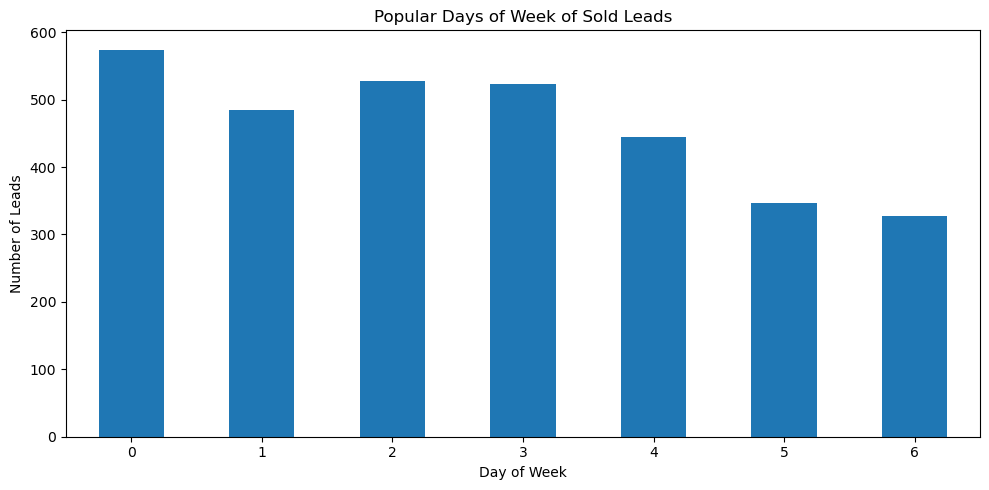

In [128]:
# count the number of leads for each day or sort it
sold_leads = leads_copy[leads_copy["VehicleSold"] == 1]
sold_per_day = sold_leads["DayOfWeek"].value_counts().sort_index()
sold_per_day.plot(kind="bar", figsize=(10, 5))
plt.xlabel("Day of Week")
plt.ylabel("Number of Leads")
plt.title("Popular Days of Week of Sold Leads")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [129]:
# Converting DRLeadAllocated to type DateTime
leads_copy["DTLeadAllocated"] = pd.to_datetime(leads_copy["DTLeadAllocated"])

# Calculating and storing the difference between lead creation and lead allocation
leads_copy["AllocationTime"] = (leads_copy["DTLeadAllocated"] - leads_copy["DTLeadCreated"]).dt.total_seconds()/60

# Dropping date Lead Created and date lead allocated
leads_copy = leads_copy.drop("DTLeadCreated", axis=1)
leads_copy = leads_copy.drop("DTLeadAllocated", axis=1)

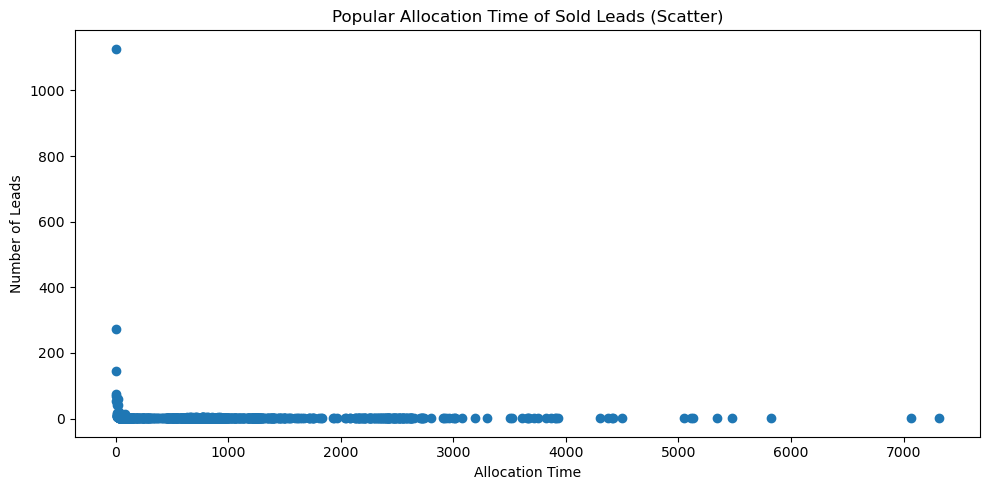

In [130]:
sold_leads = leads_copy[leads_copy["VehicleSold"] == 1]
sold_per_day = sold_leads["AllocationTime"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.scatter(sold_per_day.index, sold_per_day.values)
plt.xlabel("Allocation Time")
plt.ylabel("Number of Leads")
plt.title("Popular Allocation Time of Sold Leads (Scatter)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [131]:
print(sold_leads["AllocationTime"].value_counts())

AllocationTime
0.0       1127
1.0        273
2.0        144
5.0         74
3.0         68
          ... 
2035.0       1
2481.0       1
2431.0       1
229.0        1
1263.0       1
Name: count, Length: 792, dtype: int64


In [132]:
# Method to extract the deaer locations from the dealer name
def get_dealer_location(dealer_string):

    #remove the suffix and change to lowercase
    dealer_string = dealer_string.lower().split()

    if "multifranchise" in dealer_string:
        dealer_name = dealer_string[0]

        # check the common two word cities at the end
        if dealer_name == "cape" or dealer_name == "east" or dealer_name == "west":
            dealer_name = dealer_name + " " + dealer_string[1]

    elif "motus" in dealer_string:
        dealer_name = dealer_string[-1]

        # check the common two word cities at the end
        if dealer_name == "town" or dealer_name == "rand":
            dealer_name = dealer_string[-2] + " " + dealer_name

    else:
        dealer_name = dealer_string[-1]

        # check the common two word cities at the end
        if dealer_name == "town" or dealer_name == "rand":
            dealer_name = dealer_string[-2] + " " + dealer_name

    # check if a number was found
    if dealer_name.isdigit():
        return dealer_string[-3]
    else:
        return dealer_name


In [133]:
# Extract the Dealer's city
leads_copy["DealerCity"] =leads_copy["Dealer"].apply(get_dealer_location)
print(leads_copy[["Dealer", "DealerCity"]].head(10))

                           Dealer  DealerCity
0           Motus Chery Germiston   germiston
1      Renault Northcliff - 70045  northcliff
2   Durban Multifranchise - 70111      durban
3      Lindsay Saker VW Germiston   germiston
4   Durban Multifranchise - 70111      durban
5                  Hyundai Menlyn      menlyn
6      Renault Northcliff - 70045  northcliff
7  Alberton Multifranchise -70051    alberton
8          Motus Toyota Cape Gate        gate
9           Motus Chery Polokwane   polokwane


In [134]:
leads_copy["DealerCity"].value_counts()

DealerCity
vereeniging     4355
durban          3361
menlyn          3361
nelspruit       3331
alberton        3285
fourways        3207
east rand       3115
bryanston       3038
germiston       3000
bloemfontein    2514
northcliff      2437
park            2371
bedfordview     2182
cape town       2112
polokwane       2062
city            1895
centurion       1845
roodepoort      1747
rustenburg      1602
pinetown        1599
virtual         1472
midrand         1447
table           1389
tokai           1132
zambezi         1117
parktown        1108
mall            1098
west rand       1079
parow           1060
sandton         1050
george           977
gate             891
tygervalley      754
strijdompark     665
edenvale         648
isando           633
tzaneen          552
river            527
kimberley        443
street           383
kroonstad        362
eiland           353
culemborg        311
wonderwaters     269
kloof)           258
welkom           215
glen             208
(b

In [135]:
# Convert String features into type Category and float for the scikit Model to work with
leads_copy["Dealer"] = leads_copy["Dealer"].astype("category").cat.codes.astype("float")
leads_copy["DealerCity"] = leads_copy["DealerCity"].astype("category").cat.codes.astype("float")

In [136]:
print(leads_copy[["Dealer", "DealerCity"]].head(10))

   Dealer  DealerCity
0    47.0        18.0
1   107.0        28.0
2    12.0        11.0
3    31.0        18.0
4    12.0        11.0
5    16.0        25.0
6   107.0        28.0
7     0.0         1.0
8    96.0        16.0
9    49.0        34.0


In [137]:
# Convert String features into type Category and float for the scikit Model to work with
leads_copy["LeadType"] = leads_copy["LeadType"].astype("category").cat.codes.astype("float")
leads_copy["LeadSource"] = leads_copy["LeadType"].astype("category").cat.codes.astype("float")

In [138]:
# Convert String features into type Category and float for the scikit Model to work with
leads_copy["Seek"] = leads_copy["Seek"].astype("category").cat.codes.astype("float")

In [139]:
# Method to get cleaned InterestMake
def clean_interest_make(interest_make):
  interest_make = str(interest_make).upper().split(" ")
  interest_make = interest_make[0].split("-")
  return interest_make[0]


In [140]:
print(leads_copy["InterestMake"].value_counts())

InterestMake
Renault            16667
Volkswagen          6512
Toyota              5146
Hyundai             3646
KIA                 3135
                   ...  
ISUZU OFCOURSE!        1
Izuzu                  1
RAV 4                  1
Toyota RAV4            1
Yaris                  1
Name: count, Length: 353, dtype: int64


In [141]:
# Clean InterestMake feature
leads_copy["InterestMake"] = leads_copy["InterestMake"].apply(clean_interest_make)

In [142]:
print(leads_copy["InterestMake"].value_counts())

InterestMake
RENAULT       20880
VOLKSWAGEN     8641
TOYOTA         7289
KIA            7046
HYUNDAI        4575
              ...  
CROSS             1
CH                1
BAKKKIE           1
NISSSAN           1
VBA               1
Name: count, Length: 154, dtype: int64


In [143]:
with pd.option_context('display.max_rows', None):
    print(leads_copy["InterestMake"].value_counts())

InterestMake
RENAULT        20880
VOLKSWAGEN      8641
TOYOTA          7289
KIA             7046
HYUNDAI         4575
FORD            3049
NISSAN          2529
HONDA           2332
MITSUBISHI      2022
MERCEDES        1747
AUDI            1295
NAN             1230
CHERY           1229
ISUZU           1157
USED             869
BMW              773
MAZDA            616
GWM              568
SUZUKI           564
JETOUR           563
MG               510
VW               461
HAVAL            457
OMODA            426
JAECOO           262
OPEL             254
SUBARU           188
CITROEN          181
UNDEFINED        156
JEEP             150
LDV              116
LAND             112
MAHINDRA         105
VOLVO             88
PEUGEOT           87
CHEVROLET         83
FIAT              76
MINI              69
RENUALT           66
DATSUN            64
HYUNDAI;          26
JAGUAR            24
JAC               21
FORTUNER          16
LEXUS             15
ABARTH            15
ALFA              15


In [144]:
# Convert String features into type Category and float for the scikit Model to work with
leads_copy["InterestMake"] = leads_copy["InterestMake"].astype("category").cat.codes.astype("float")

In [145]:
# Method to only get the first word in the InterestModel feature
def clean_interest_model(interest_model):
  interest_model=str(interest_model).upper().split(" ")

  return interest_model[0]

In [146]:
# Clean the InterestModel feature
leads_copy["InterestModel"] = leads_copy["InterestModel"].apply(clean_interest_model)

In [147]:
print(leads_copy["InterestModel"].value_counts())

InterestModel
KWID          7873
NAN           6845
POLO          6094
TRIBER        3543
SONET         2138
              ... 
CAROLLA          1
LANDCRUISE       1
ALLION           1
XXX              1
EQS              1
Name: count, Length: 783, dtype: int64


In [148]:
with pd.option_context('display.max_rows', None):
  print(leads_copy["InterestModel"].value_counts().head(100))

InterestModel
KWID          7873
NAN           6845
POLO          6094
TRIBER        3543
SONET         2138
KIGER         2092
RANGER        1598
PICANTO       1541
KOLEOS        1525
GRAND         1471
COROLLA       1279
TIGGO         1194
HILUX         1064
SELTOS         926
MAGNITE        909
AMAZE          858
2023           783
STARLET        724
CLIO           711
RENAULT        669
I20            653
D-MAX          632
XPANDER        602
DUSTER         592
THE            575
FORTUNER       557
TIGUAN         549
T-CROSS        519
GOLF           514
EXTER          493
SPECIAL        486
NAVARA         477
NP200          400
ENQUIRE        383
C5             382
URBAN          360
AMAROK         350
ECOSPORT       328
MG             328
HAVAL          308
A3             296
DIESEL         290
Q3             269
XR190CT        263
J7             262
CAPTUR         257
SWIFT          251
CRETA          250
QUANTUM        249
ELEVATE        246
RUMION         242
SESFIKILE      24

In [149]:
# Convert String features into type Category and float for the scikit Model to work with
leads_copy["InterestModel"] = leads_copy["InterestModel"].astype("category").cat.codes.astype("float")

In [150]:
# Method to check if the name is a full name
def is_full_name(full_name):
  full_name = str(full_name).split(" ")

  if len(full_name) < 2:
    return 0
  else:
    return 1

In [151]:
# Check if the name given is a valid full name
leads_copy["IsFullName"] = leads_copy["OBSFullName"].apply(is_full_name)

# Drop OBSFUllName
leads_copy = leads_copy.drop("OBSFullName", axis=1)

In [152]:
# Drop OBSEmail
leads_copy = leads_copy.drop("OBSEmail", axis=1)

In [153]:
# show the domains of customers who bought a vehicle
sold_leads["Domain"].value_counts()

Domain
@gmail.com              2386
@yahoo.com                95
@icloud.com               64
@hotmail.com              30
@gmail.com                29
                        ... 
@phayhu                    1
@gmail.com.za              1
@selfbundedtanks.com       1
@openserve.co.za           1
@ccbagroup.com             1
Name: count, Length: 316, dtype: int64

In [154]:
# retrieves the company of the email domain
def retrieve_email_company(email_domain):
    if pd.isna(email_domain):
        return "UNKNOWN"
    domain_array = email_domain.split(".")
    return domain_array[0]

# retrieves the TLD of the email domain
def retrieve_email_tld(email_domain):
    if pd.isna(email_domain):
        return "UNKNOWN"
    domain_array = email_domain.split(".")
    return ".".join(domain_array[1:])

In [155]:
# Extract the comapny of controlling the email domain
leads_copy["DomainCompany"] = leads_copy["Domain"].apply(retrieve_email_company)
print(leads_copy["DomainCompany"].value_counts())

# Convert the string feature to a usable fload value
leads_copy["DomainCompany"] = leads_copy["DomainCompany"].astype("category").cat.codes.astype("float")


DomainCompany
@gmail            55639
UNKNOWN            7787
@yahoo             1778
@icloud            1000
@hotmail            449
                  ...  
@habarimedia          1
@gen4foods            1
@urbansoul            1
@securitas-rsa        1
@madembeict           1
Name: count, Length: 2962, dtype: int64


In [156]:
# Extract the TLD from the Domain
leads_copy["DomainTLD"] = leads_copy["Domain"].apply(retrieve_email_tld)
print(leads_copy["DomainTLD"].value_counts())

# Convert string feature into usable float value
leads_copy["DomainTLD"] = leads_copy["DomainTLD"].astype("category").cat.codes.astype("float")


DomainTLD
com             59843
UNKNOWN          7787
co.za            3262
com               417
gov.za            283
                ...  
comtr               1
zco.za              1
sg                  1
rlowrbqcnlvr        1
g.cm                1
Name: count, Length: 316, dtype: int64


In [157]:
# check if there were sold vehicle with a the email missing
sold_leads = leads_copy[leads_copy["VehicleSold"] == 1]
sold_missing_email = sold_leads[sold_leads["DomainCompany"] == "UNKNOWN"]
print(f"Sold Missing Email: {sold_missing_email.shape}, All Sold: {sold_leads.shape}")

Sold Missing Email: (0, 21), All Sold: (3228, 21)


In [158]:
# Drop domain feature
leads_copy = leads_copy.drop("Domain", axis=1)

In [159]:
# check if a cellphone prefix is valid
def cell_prefix_is_valid(cell_prefix):
    # check if does not contain characters
    if not cell_prefix.isdigit():
        return 0
    else:
        # check if it is 2 digits
        if len(cell_prefix) != 2:
            return 0
        else:
            return 1

In [160]:
# Check if the cellprefix is valid
leads_copy["ValidPrefix"] = leads_copy["CellPrefix"].apply(cell_prefix_is_valid)

# Convert string feature into usable float value
leads_copy["CellPrefix"] = leads_copy["CellPrefix"].astype("category").cat.codes.astype("float")

# check if any invalid cell prefixes purchased a vehicle
sold_invalid_prefixes = leads_copy[(leads_copy["ValidPrefix"] == 0) & (leads_copy["VehicleSold"] == 1)]
sold_invalid_prefixes[["CellPrefix", "CellPhoneNoLength", "VehicleSold"]]

,CellPrefix,CellPhoneNoLength,VehicleSold
11419,0.0,9,1
11833,0.0,9,1
22510,3.0,10,1
24316,1.0,10,1
49250,0.0,9,1
50680,0.0,1,1
54707,2.0,10,1


In [161]:
leads_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73286 entries, 0 to 73285
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Dealer                     73286 non-null  float64
 1   LeadSource                 73286 non-null  float64
 2   LeadType                   73286 non-null  float64
 3   Seek                       73286 non-null  float64
 4   InterestMake               73286 non-null  float64
 5   InterestModel              73286 non-null  float64
 6   CellPrefix                 73286 non-null  float64
 7   CellPhoneNoLength          73286 non-null  int64  
 8   HourOfEnquiry              73286 non-null  int64  
 9   DayOfEnquiry               73286 non-null  int64  
 10  InFinanceProcessSystemApp  73286 non-null  int64  
 11  FinanceApplied             73286 non-null  int64  
 12  FinanceApproved            73286 non-null  int64  
 13  VehicleSold                73286 non-null  int

In [162]:
# Store and Drop target feature
target = leads_copy["VehicleSold"]
leads_copy = leads_copy.drop("VehicleSold", axis=1)



In [163]:
# Remove finance columns that leak future info
leads_copy = leads_copy.drop(
    ["InFinanceProcessSystemApp", "FinanceApplied", "FinanceApproved"],
    axis=1
)


In [164]:
leads_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73286 entries, 0 to 73285
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dealer             73286 non-null  float64
 1   LeadSource         73286 non-null  float64
 2   LeadType           73286 non-null  float64
 3   Seek               73286 non-null  float64
 4   InterestMake       73286 non-null  float64
 5   InterestModel      73286 non-null  float64
 6   CellPrefix         73286 non-null  float64
 7   CellPhoneNoLength  73286 non-null  int64  
 8   HourOfEnquiry      73286 non-null  int64  
 9   DayOfEnquiry       73286 non-null  int64  
 10  DayOfWeek          73286 non-null  int32  
 11  AllocationTime     73286 non-null  float64
 12  DealerCity         73286 non-null  float64
 13  IsFullName         73286 non-null  int64  
 14  DomainCompany      73286 non-null  float64
 15  DomainTLD          73286 non-null  float64
 16  ValidPrefix        732

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (average_precision_score,log_loss,precision_recall_curve,confusion_matrix)

In [166]:
#Split the data for training and testing
X_train,X_test,y_train,y_test = train_test_split(
    leads_copy,
    target,
    test_size=0.2,
    stratify=target,
    random_state=2
)



In [167]:
#Create and train a random forest 
rnd_clf= RandomForestClassifier(n_estimators=500 ,max_leaf_nodes=32 ,n_jobs=-1 ,class_weight='balanced',random_state=42)

In [168]:
#Fit the model

rnd_clf.fit(X_train,y_train)



RandomForestClassifier(class_weight='balanced', max_leaf_nodes=32,
                       n_estimators=500, n_jobs=-1, random_state=42)

In [169]:
#Predict ( probabilities for the class 1  for vehicle sold )
y_test_probs = rnd_clf.predict_proba(X_test)[:,1]


In [170]:
#get the PR_AUC
pr_auc= average_precision_score(y_test,y_test_probs)
print(f"PR-AUC on validation set:{pr_auc:.4f}")

PR-AUC on validation set:0.0717


In [171]:
#Dont matter for now 

ll = log_loss(y_test, y_test_probs)

print(f"Log Loss on validation set: {ll:.4f}")


Log Loss on validation set: 0.6357


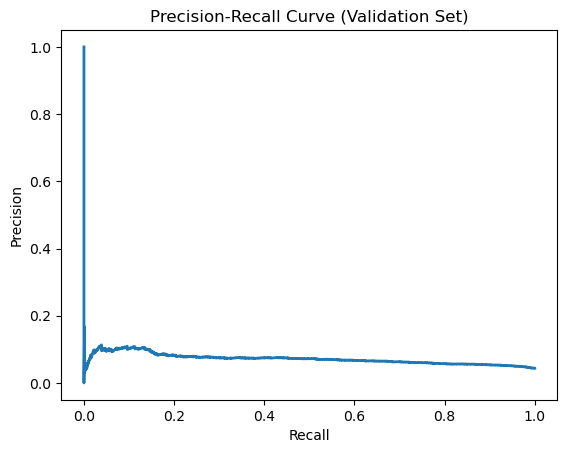

In [172]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_probs)

plt.plot(recall, precision, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Validation Set)")
plt.show()


In [173]:
#Evaluate at a classification threshold using probability
#threshold  to classyify as sold 
threshold =0.5

#Turn the probabilities into predictions 
y_test_pred =(y_test_probs >=threshold).astype(int)


In [174]:

#Map out predictions 
cm=confusion_matrix(y_test ,y_test_pred)
tn,fp,fn,tp =cm.ravel()


print("Confusion Matrix ")
print(cm)
print("True Negatives: " ,tn)
print("False Positives: " ,fp)
print("False Negatives: " ,fn)
print("True Positives: " ,tp)


Confusion Matrix 
[[7494 6518]
 [ 205  441]]
True Negatives:  7494
False Positives:  6518
False Negatives:  205
True Positives:  441


In [175]:

#calculate 
precison=tp/(tp+fp)
print("Precison" ,precison)

recall=tp/(tp+fn)
print("Recall" ,recall)

Precison 0.06337117401925564
Recall 0.6826625386996904


In [176]:
#f1 score 
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_test_pred, zero_division=0)
print("F1 Score:", f1)


F1 Score: 0.11597633136094675


In [177]:
counts = leads_copy["InterestMake"].value_counts()
rare_makes = counts[counts < 500]
print(rare_makes)


InterestMake
146.0    461
64.0     457
113.0    426
77.0     262
114.0    254
        ... 
42.0       1
33.0       1
28.0       1
110.0      1
143.0      1
Name: count, Length: 133, dtype: int64


In [178]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    average_precision_score,
    log_loss,
    roc_auc_score,
    precision_recall_curve,
    confusion_matrix
)

In [180]:
# Convert potential categorical columns to string
potential_categories = [
    "Dealer", 
    "LeadSource", 
    "LeadType", 
    "Seek", 
    "InterestMake", 
    "InterestModel", 
    "CellPrefix",
    "DealerCity", 
    "DomainCompany", 
    "DomainTLD", 
    
]


for col in potential_categories:
    if col in leads_copy.columns:
        leads_copy[col] = leads_copy[col].astype(str)

# Split data
X_train, X_val, y_train, y_val = train_test_split(
    leads_copy,
    target,
    test_size=0.2,
    stratify=target,
    random_state=42
)


print("Training shape:", X_train.shape)
print("Validation shape:", X_val.shape)


Training shape: (58628, 17)
Validation shape: (14658, 17)


In [181]:

# Identify categorical features
categorical_features = [col for col in potential_categories if col in X_train.columns]
print("Categorical features for CatBoost:", categorical_features)

# Create Pools for CatBoost
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
val_pool = Pool(X_val, y_val, cat_features=categorical_features)


# Calculate class weight for imbalance
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print("Scale_pos_weight: " ,scale_pos_weight)


#Train model with my best parameters 

# Best parameters from  tuning
best_params = {
    'iterations': 300,
    'learning_rate': 0.05,
    'depth': 5,
    'l2_leaf_reg': 1
}

# Instantiate final model
catboost_model = CatBoostClassifier(
    iterations=best_params['iterations'],
    learning_rate=best_params['learning_rate'],
    depth=best_params['depth'],
    l2_leaf_reg=best_params['l2_leaf_reg'],
    eval_metric='PRAUC',
    scale_pos_weight=scale_pos_weight,
    cat_features=categorical_features,
    random_state=42,
    verbose=50,
    early_stopping_rounds=20
)


# Train model 
catboost_model.fit(train_pool, eval_set=val_pool)



Categorical features for CatBoost: ['Dealer', 'LeadSource', 'LeadType', 'Seek', 'InterestMake', 'InterestModel', 'CellPrefix', 'DealerCity', 'DomainCompany', 'DomainTLD']
Scale_pos_weight:  21.706429124709526
0:	learn: 0.6159890	test: 0.5988472	best: 0.5988472 (0)	total: 82.9ms	remaining: 24.8s
50:	learn: 0.6522397	test: 0.6360164	best: 0.6360164 (50)	total: 3.94s	remaining: 19.2s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.6391399448
bestIteration = 64

Shrink model to first 65 iterations.


In [182]:
feat_imp = catboost_model.get_feature_importance(prettified=True)
print(feat_imp)


           Feature Id  Importances
0        InterestMake    19.773248
1       InterestModel    14.521320
2           DomainTLD    12.344373
3            LeadType    11.597293
4          CellPrefix    10.965225
5          LeadSource     9.557301
6                Seek     7.884428
7      AllocationTime     3.538622
8              Dealer     3.395338
9       DomainCompany     1.925052
10         DealerCity     1.645136
11          DayOfWeek     1.638520
12      HourOfEnquiry     0.574547
13       DayOfEnquiry     0.480476
14  CellPhoneNoLength     0.159123
15         IsFullName     0.000000
16        ValidPrefix     0.000000


In [183]:
# Get  columns used for the original RF
rf_features = rnd_clf.feature_names_in_.tolist()

# Prepare the validation set with same columns
X_val_for_rf = X_val[rf_features]

# Predict with Random Forest
y_pred_probs_rf = rnd_clf.predict_proba(X_val_for_rf)[:, 1]

# CatBoost predictions
y_pred_probs_catboost = catboost_model.predict_proba(X_val)[:, 1]

# Blended probabilities (50-50)
mixed_probs = 0.5 * y_pred_probs_catboost + 0.5 * y_pred_probs_rf

# Evaluate blended model
pr_auc_mixed= average_precision_score(y_val,mixed_probs)
print("Blended PR-AUC: ",pr_auc_mixed)


Blended PR-AUC:  0.09172105154173428


In [184]:
mixed_log_loss = log_loss(y_val, mixed_probs)
print("Blended Log Loss:", mixed_log_loss)

Blended Log Loss: 0.6351867174627047


In [190]:
# Load Test CSV
test_data = pd.read_csv("TestData.csv")

In [191]:
# Store and drop the Lead ID
lead_ids = test_data["LeadID"]
test_data = test_data.drop("LeadID", axis=1)

# Drop Customer ID
test_data = test_data.drop("CustomerID", axis=1)

# Converting DTLeadCreated to type DateTime
test_data["DTLeadCreated"] = pd.to_datetime(test_data["DTLeadCreated"])
test_data["DayOfWeek"] = test_data["DTLeadCreated"].dt.dayofweek # Extracting The Day of the Week from the date

# Converting DRLeadAllocated to type DateTime
test_data["DTLeadAllocated"] = pd.to_datetime(test_data["DTLeadAllocated"])

# Calculating and storing the difference between lead creation and lead allocation
test_data["AllocationTime"] = (test_data["DTLeadAllocated"] - test_data["DTLeadCreated"]).dt.total_seconds()/60

# Dropping date Lead Created and date lead allocated
test_data = test_data.drop("DTLeadCreated", axis=1)
test_data = test_data.drop("DTLeadAllocated", axis=1)

# Method to extract the deaer locations from the dealer name
def get_dealer_location(dealer_string):

    #remove the suffix and change to lowercase
    dealer_string = dealer_string.lower().split()

    if "multifranchise" in dealer_string:
        dealer_name = dealer_string[0]

        # check the common two word cities at the end
        if dealer_name == "cape" or dealer_name == "east" or dealer_name == "west":
            dealer_name = dealer_name + " " + dealer_string[1]

    elif "motus" in dealer_string:
        dealer_name = dealer_string[-1]

        # check the common two word cities at the end
        if dealer_name == "town" or dealer_name == "rand":
            dealer_name = dealer_string[-2] + " " + dealer_name

    else:
        dealer_name = dealer_string[-1]

        # check the common two word cities at the end
        if dealer_name == "town" or dealer_name == "rand":
            dealer_name = dealer_string[-2] + " " + dealer_name

    # check if a number was found
    if dealer_name.isdigit():
        return dealer_string[-3]
    else:
        return dealer_name


# Extract the Dealer's city
test_data["DealerCity"] =test_data["Dealer"].apply(get_dealer_location)

# Convert String features into type Category and float for the scikit Model to work with
test_data["Dealer"] = test_data["Dealer"].astype("category").cat.codes.astype("float")
test_data["DealerCity"] = test_data["DealerCity"].astype("category").cat.codes.astype("float")

# Convert String features into type Category and float for the scikit Model to work with
test_data["LeadType"] = test_data["LeadType"].astype("category").cat.codes.astype("float")
test_data["LeadSource"] = test_data["LeadType"].astype("category").cat.codes.astype("float")

# Convert String features into type Category and float for the scikit Model to work with
test_data["Seek"] = test_data["Seek"].astype("category").cat.codes.astype("float")

# Method to get cleaned InterestMake
def clean_interest_make(interest_make):
  interest_make = str(interest_make).upper().split(" ")
  interest_make = interest_make[0].split("-")
  return interest_make[0]

# Clean InterestMake feature
test_data["InterestMake"] = test_data["InterestMake"].apply(clean_interest_make)

# Convert String features into type Category and float for the scikit Model to work with
test_data["InterestMake"] = test_data["InterestMake"].astype("category").cat.codes.astype("float")

# Method to only get the first word in the InterestModel feature
def clean_interest_model(interest_model):
  interest_model=str(interest_model).upper().split(" ")

  return interest_model[0]

# Clean the InterestModel feature
test_data["InterestModel"] = test_data["InterestModel"].apply(clean_interest_model)

# Convert String features into type Category and float for the scikit Model to work with
test_data["InterestModel"] = test_data["InterestModel"].astype("category").cat.codes.astype("float")

# Method to check if the name is a full name
def is_full_name(full_name):
  full_name = str(full_name).split(" ")

  if len(full_name) < 2:
    return 0
  else:
    return 1

# Check if the name given is a valid full name
test_data["IsFullName"] = test_data["OBSFullName"].apply(is_full_name)

# Drop OBSFUllName
test_data = test_data.drop("OBSFullName", axis=1)

# Drop OBSEmail
test_data = test_data.drop("OBSEmail", axis=1)

# retrieves the company of the email domain
def retrieve_email_company(email_domain):
    if pd.isna(email_domain):
        return "UNKNOWN"
    domain_array = email_domain.split(".")
    return domain_array[0]

# retrieves the TLD of the email domain
def retrieve_email_tld(email_domain):
    if pd.isna(email_domain):
        return "UNKNOWN"
    domain_array = email_domain.split(".")
    return ".".join(domain_array[1:])

# Extract the comapny of controlling the email domain
test_data["DomainCompany"] = test_data["Domain"].apply(retrieve_email_company)

# Convert the string feature to a usable fload value
test_data["DomainCompany"] = test_data["DomainCompany"].astype("category").cat.codes.astype("float")

# Extract the TLD from the Domain
test_data["DomainTLD"] = test_data["Domain"].apply(retrieve_email_tld)

# Convert string feature into usable float value
test_data["DomainTLD"] = test_data["DomainTLD"].astype("category").cat.codes.astype("float")

# Drop domain feature
test_data = test_data.drop("Domain", axis=1)

# check if a cellphone prefix is valid
def cell_prefix_is_valid(cell_prefix):
    # check if does not contain characters
    if not cell_prefix.isdigit():
        return 0
    else:
        # check if it is 2 digits
        if len(cell_prefix) != 2:
            return 0
        else:
            return 1

# Check if the cellprefix is valid
test_data["ValidPrefix"] = test_data["CellPrefix"].apply(cell_prefix_is_valid)

# Convert string feature into usable float value
test_data["CellPrefix"] = test_data["CellPrefix"].astype("category").cat.codes.astype("float")

In [192]:
test_data.info

<bound method DataFrame.info of        Dealer  LeadSource  LeadType  Seek  InterestMake  InterestModel  \
0        23.0         6.0       6.0   0.0          49.0          335.0   
1       107.0         4.0       4.0   0.0          81.0          428.0   
2        72.0         4.0       4.0   0.0          61.0          298.0   
3        28.0         0.0       0.0   1.0          90.0          337.0   
4       101.0         6.0       6.0   1.0          39.0          255.0   
...       ...         ...       ...   ...           ...            ...   
15606     0.0         4.0       4.0   0.0          81.0          279.0   
15607   104.0         1.0       1.0   1.0          81.0          428.0   
15608    71.0         4.0       4.0   0.0          61.0          251.0   
15609    13.0         4.0       4.0   1.0          66.0          473.0   
15610    31.0         8.0       8.0   1.0          90.0          337.0   

       CellPrefix  CellPhoneNoLength  HourOfEnquiry  DayOfEnquiry  DayOfWeek  \

In [193]:
# Keep original copy of test_data
test_data_copy = test_data.copy()

In [194]:
#Create CatBoost Pool
for col in potential_categories:
    if col in leads_copy.columns:
        test_data[col] = test_data[col].astype(str)

test_pool = Pool(
    data = test_data,
    cat_features = potential_categories
)

In [197]:
# CatBoost Prediction
catboost_probs = catboost_model.predict_proba(test_pool)[:, 1]

In [198]:
# Random FOrest Prediction
rf_probs = rnd_clf.predict_proba(test_data)[:, 1]

In [201]:
# Blended predictions
mixed_probs = 0.5 * catboost_probs + 0.5 * rf_probs

In [202]:
# Create output DataFrame
output = pd.DataFrame({
    "LeadId": lead_ids,
    "VehicleSoldProbability": mixed_probs
})

In [203]:
# Save CSV
output.to_csv("submission.csv", index=False)
print("Prediction saved")

Prediction saved
